In [5]:
import matplotlib.pyplot as plt
import numpy as np
from pipe import Pipe
from typing import Any,Union
data=[[1,2,3,4],[5,6,7,8]]
def forward(x:Union[list,np.array],y:Union[list,np.array]) -> Any:
    plt.bar(x,y)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.title("Bar Graph")
    plt.show()

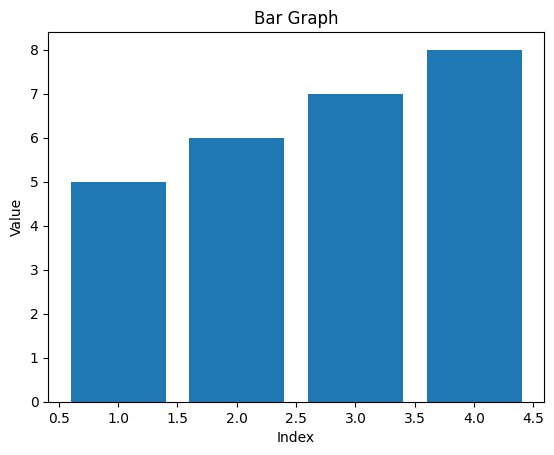

In [6]:
forward(data[0],data[1])